In [2]:
#importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

import warnings
warnings.filterwarnings('ignore')

In [3]:
#get the CSV data 
df=pd.read_csv('happiness_score_dataset.csv')
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
#print summary
print('shape------> ',df.shape)
print('Each column and datatype and its count','\n')
print(df.info())

shape------>  (158, 12)
Each column and datatype and its count 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null  

In [5]:
#DataFrame statistics
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


1. no null values                               

In [6]:
#droping unwanted column
df=df.drop(columns=['Country','Region','Happiness Rank','Standard Error','Dystopia Residual'])
df.head()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


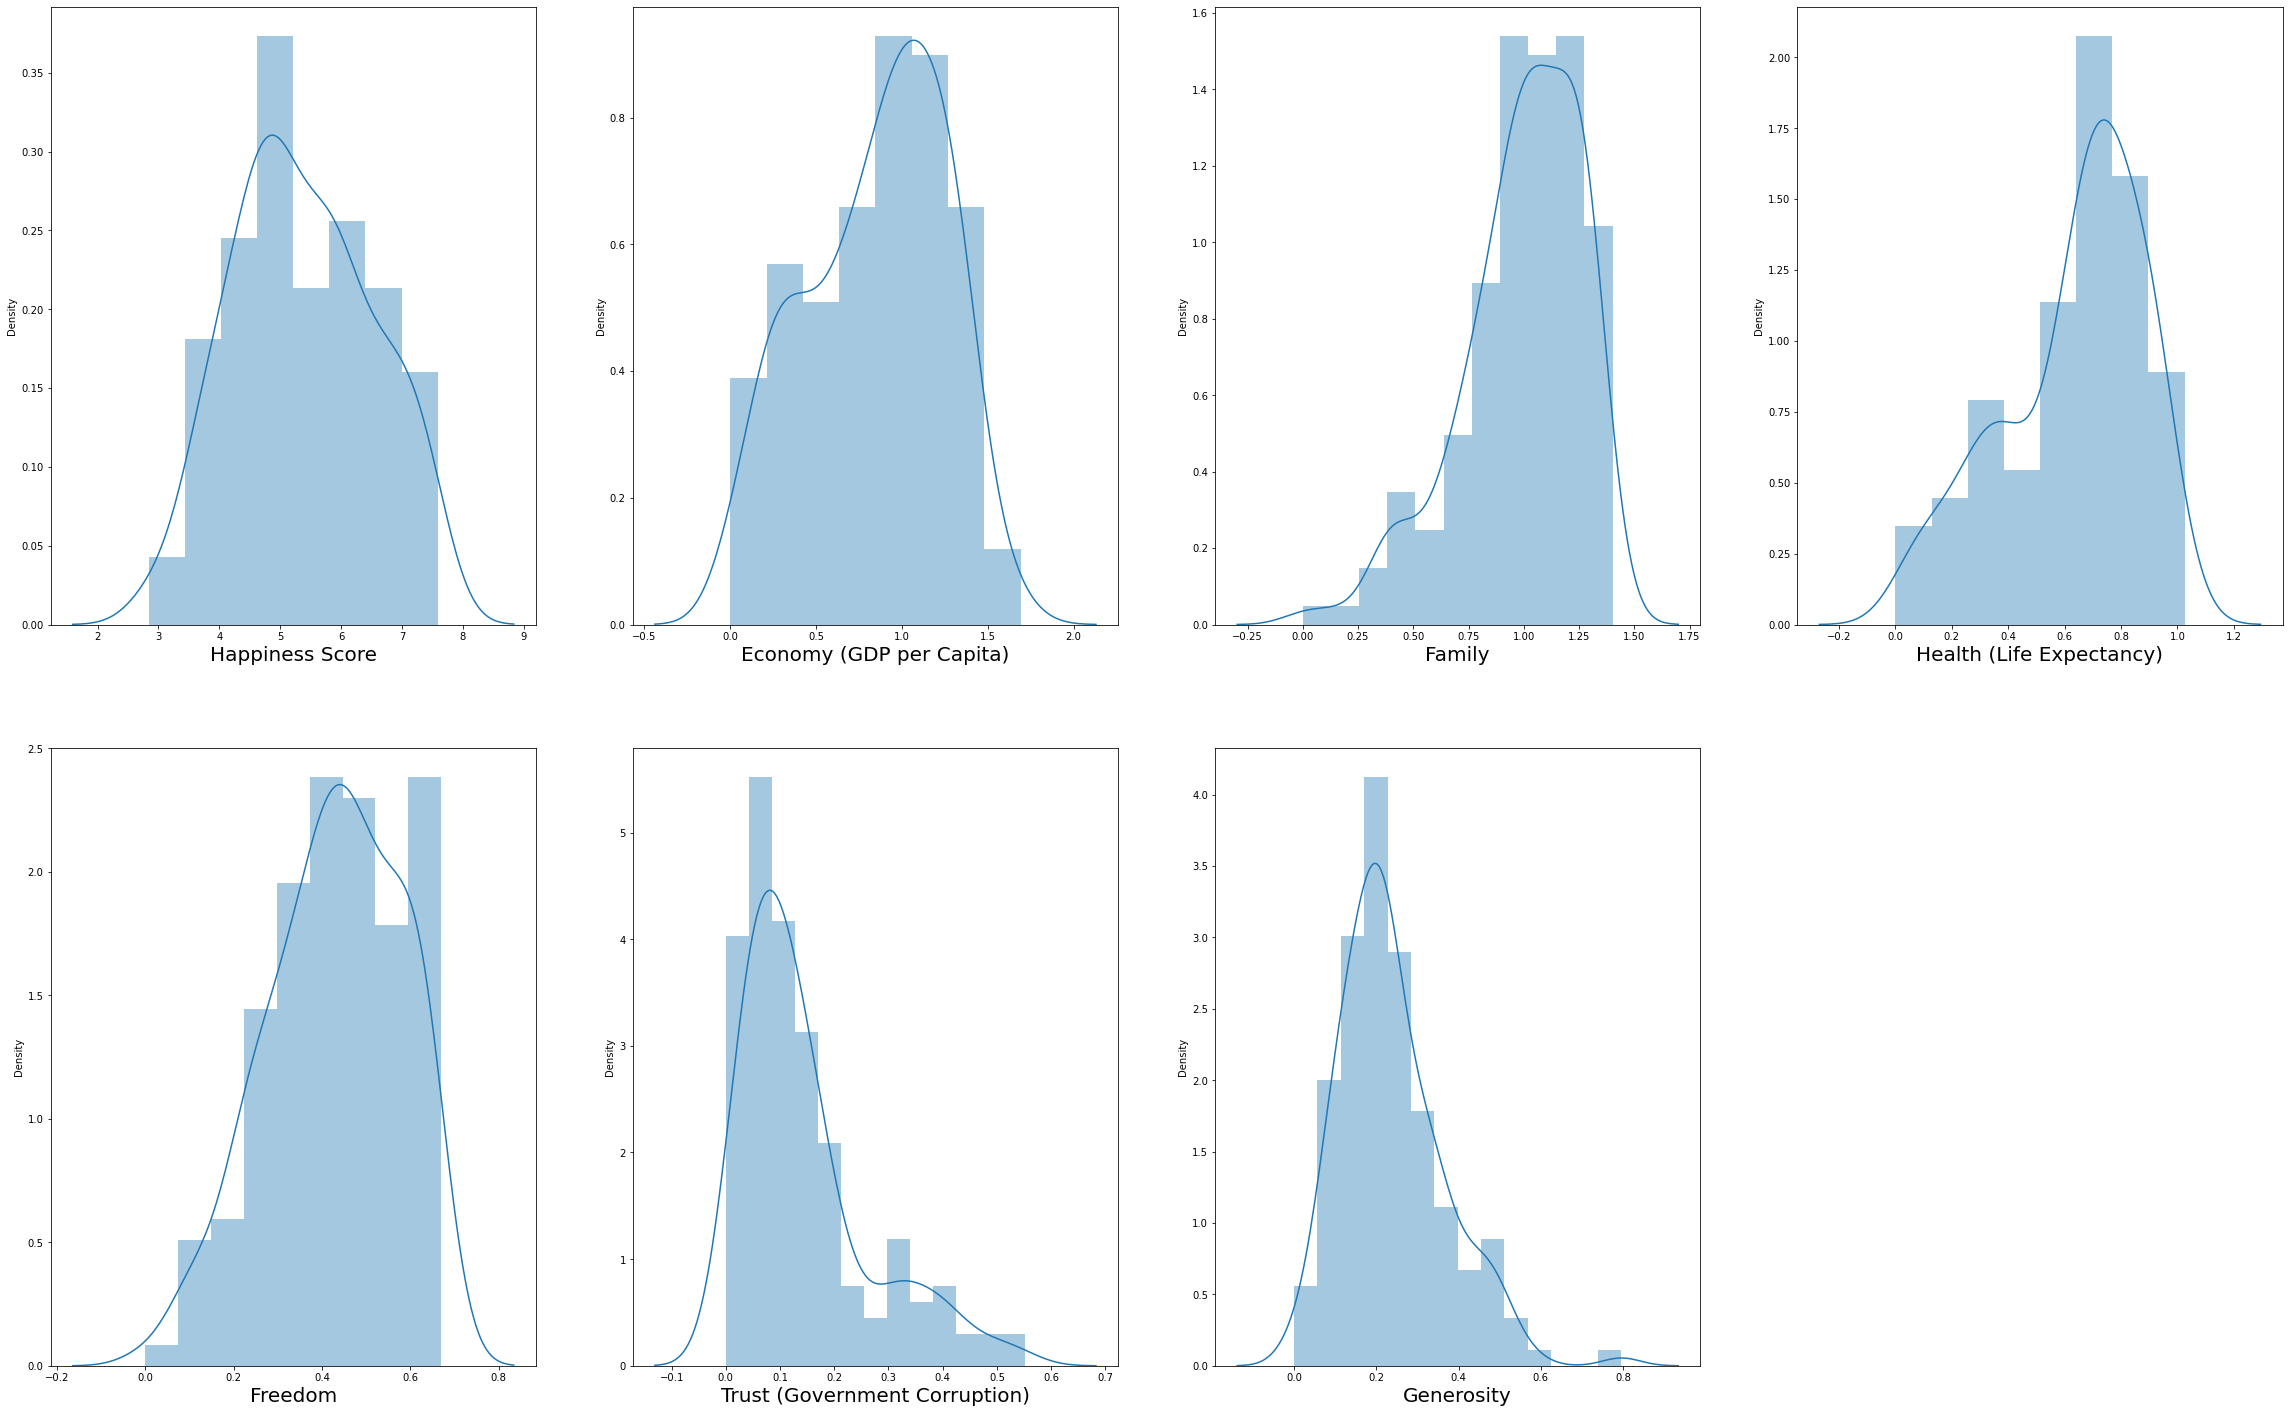

In [9]:
#let's see how data is distributed for every column
plt.figure(figsize=(40,25),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()    

This data distribution looks decent enough and there doesn't seem any skewness                       

In [11]:
#Divide data set into features and label
y=df['Happiness Score']
x=df.drop(columns=['Happiness Score'])

In [12]:
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
153    3.465
154    3.340
155    3.006
156    2.905
157    2.839
Name: Happiness Score, Length: 158, dtype: float64

In [13]:
x

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...
153,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628
154,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260
155,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179
156,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727


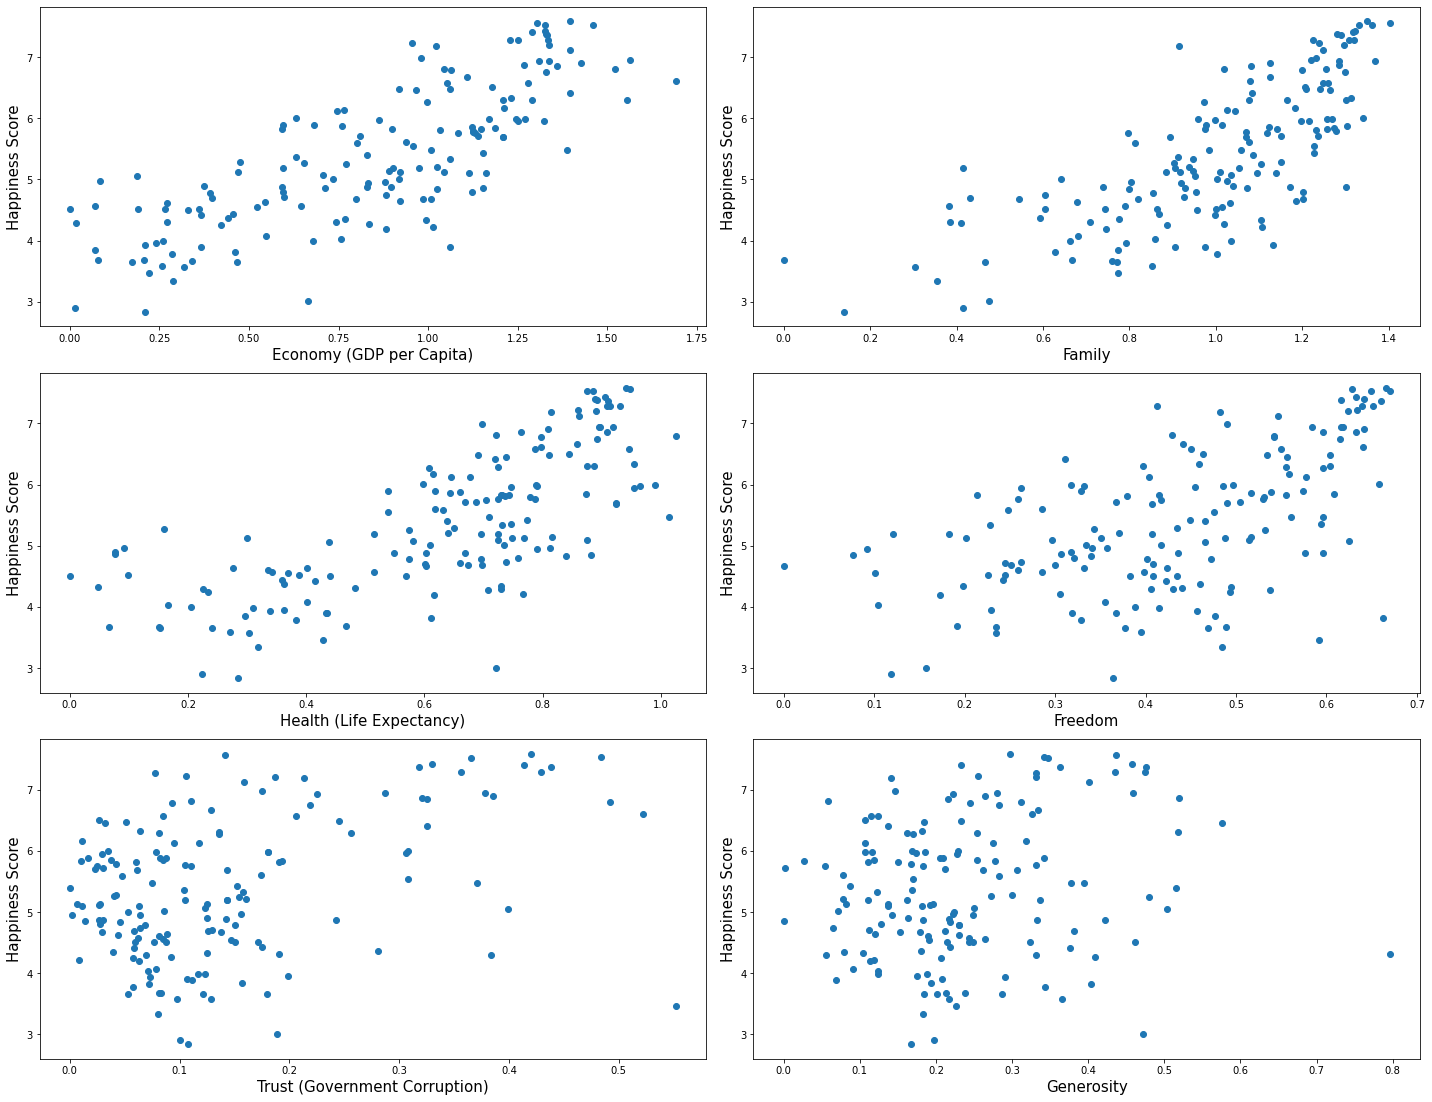

In [17]:
#visualizing Relationship
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for column in x:
    if plotnumber<=8:
        ax=plt.subplot(4,2,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=15)
        plt.ylabel('Happiness Score',fontsize=15)
     
    plotnumber+=1
plt.tight_layout()    

The relationship between the dependent and independent variables look fairly linear 

In [18]:
#Data Scaling
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [19]:
x_scaled

array([[ 1.36962124e+00,  1.32028142e+00,  1.26340809e+00,
         1.57743784e+00,  2.30965159e+00,  4.71039706e-01],
       [ 1.13522625e+00,  1.51445776e+00,  1.28943383e+00,
         1.33245589e+00, -1.64795307e-02,  1.57585637e+00],
       [ 1.19286069e+00,  1.36105403e+00,  9.92228817e-01,
         1.46965910e+00,  2.84277380e+00,  8.24292797e-01],
       [ 1.52512972e+00,  1.25192192e+00,  1.03514490e+00,
         1.60513145e+00,  1.85208080e+00,  8.68637502e-01],
       [ 1.19487640e+00,  1.22120434e+00,  1.11805373e+00,
         1.36041579e+00,  1.55572536e+00,  1.74856316e+00],
       [ 1.10518965e+00,  1.20518259e+00,  1.05097959e+00,
         1.41846586e+00,  2.25900540e+00, -2.99762791e-02],
       [ 1.20271529e+00,  1.06489092e+00,  1.06612405e+00,
         1.24584679e+00,  1.46019962e+00,  1.89102052e+00],
       [ 1.20836426e+00,  1.09767107e+00,  1.13932906e+00,
         1.53902627e+00,  2.46560175e+00,  9.92406743e-01],
       [ 1.00547410e+00,  1.21037585e+00,  1.129

In [27]:
#split data into train & test model will be built on training data and test data
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=330)

In [21]:
y_train.head()

10     7.278
142    3.896
50     5.890
6      7.378
1      7.561
Name: Happiness Score, dtype: float64

In [22]:
#model instantiating & training
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [23]:
#predict the happiness score from given features
df.tail(2)

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
156,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727
157,2.839,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681


In [24]:
print('Happiness Score : ',regression.predict(scaler.transform([[0.01530,0.41587,0.22396,0.11850,0.10062,0.19727]])))

Happiness Score :  [2.95094286]


In [25]:
#To get the amount of trust that how much the given data fit the model.
#Adjusted R2 score
regression.score(x_train,y_train)

0.7663008427646968

so, 76% fit the model

In [28]:
#to check how well model fits the test data
regression.score(x_test,y_test)

0.7871503667618178

78% of test data fit the model

In [29]:
#let's plot and visualize 
y_pred=regression.predict(x_test)
y_pred

array([4.06545395, 4.79132338, 5.66945885, 5.90203805, 5.24561205,
       5.71595671, 5.40605784, 7.12049   , 5.77181987, 5.02094691,
       3.38073569, 4.84218691, 4.81436281, 6.5111096 , 5.09321078,
       4.03131984, 7.16061058, 4.14709121, 6.49630327, 4.81191895,
       6.10824181, 5.96765248, 6.03560745, 6.07980066, 4.85387603,
       4.07472886, 2.563886  , 5.26152288, 5.11583232, 2.95094286,
       5.60516837, 4.73349978, 5.75296331, 6.06828987, 3.32788985,
       5.93008457, 6.8476523 , 4.62532126, 6.62772895, 3.94726938])

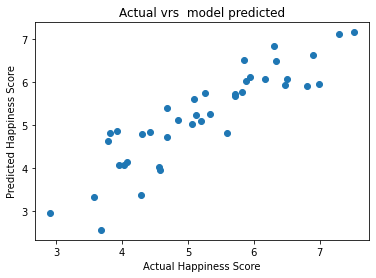

In [32]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('Actual vrs  model predicted')
plt.show()

# To check wheatherthe model is overfitted or not--------                        

In [33]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [34]:
#Lasso Regularization
lasscv=LassoCV(alphas=None,max_iter=1000,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(normalize=True)

In [35]:
#best alpha parameter
alpha=lasscv.alpha_
alpha

8.092781486486052e-05

In [36]:
#Now that we have best parameters ,let's use Lasso regression  and see how well our data has fitted model.
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=8.092781486486052e-05)

In [37]:
lasso_reg.score(x_test,y_test)

0.7871842543930095

Then we compare with the regression.score,if the value is approx same,then model is not overfitted.

In [38]:
# Using Ridge regression model
ridgecv=RidgeCV(alphas=np.arange(0.001,0.1,0.001),normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
       0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018,
       0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027,
       0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035, 0.036,
       0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044, 0.045,
       0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053, 0.054,
       0.055, 0.056, 0.057, 0.058, 0.059, 0.06 , 0.061, 0.062, 0.063,
       0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07 , 0.071, 0.072,
       0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08 , 0.081,
       0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089, 0.09 ,
       0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098, 0.099]),
        normalize=True)

In [39]:
#best alpha parameter
ridgecv.alpha_

0.099

In [40]:
ridge_model=Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.099)

In [42]:
ridge_model.score(x_test,y_test)

0.7872882474148303

we got around same R2 score using Ridge regularization as well as from Lasso regularization. so, it's safe to say there is no overfitting.

In [47]:
#saving model
filename='finalized_model.pickle'
pickle.dump(regression,open(filename,'wb'))

In [48]:
#prediction using the saved model
loaded_model=pickle.load(open(filename,'rb'))
a=loaded_model.predict(scaler.transform([[0.01530,0.41587,0.22396,0.11850,0.10062,0.19727]]))

In [49]:
a

array([2.95094286])